In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV files to inspect the data
file_path = r'C:\Users\Pear\Documents\Data Projects\data_files\cleaned_data\2000_inflation_rates.csv'

file_path_2 = r'C:\Users\Pear\Documents\Data Projects\data_files\cleaned_data\Adjusted_Beef_Prices.csv'

file_path_3 = r'C:\Users\Pear\Documents\Data Projects\data_files\cleaned_data\US_Bigmac_prices.csv'

df_inflation = pd.read_csv(file_path)

df_beef = pd.read_csv(file_path_2)

df_bigmac = pd.read_csv(file_path_3)

In [2]:
# Merge datasets on "year"
df_merged = df_inflation.merge(df_beef, on="year", how="inner").merge(df_bigmac, on="year", how="inner")

In [3]:
df_merged.head()

,year,inflation rate,Beef_Price_Adjusted,local_price
0,2000,2.24,2.24,2.24
1,2001,2.32,2.22,2.24
2,2002,2.35,2.54,2.35
3,2003,2.42,2.34,2.46
4,2004,2.46,2.92,2.47


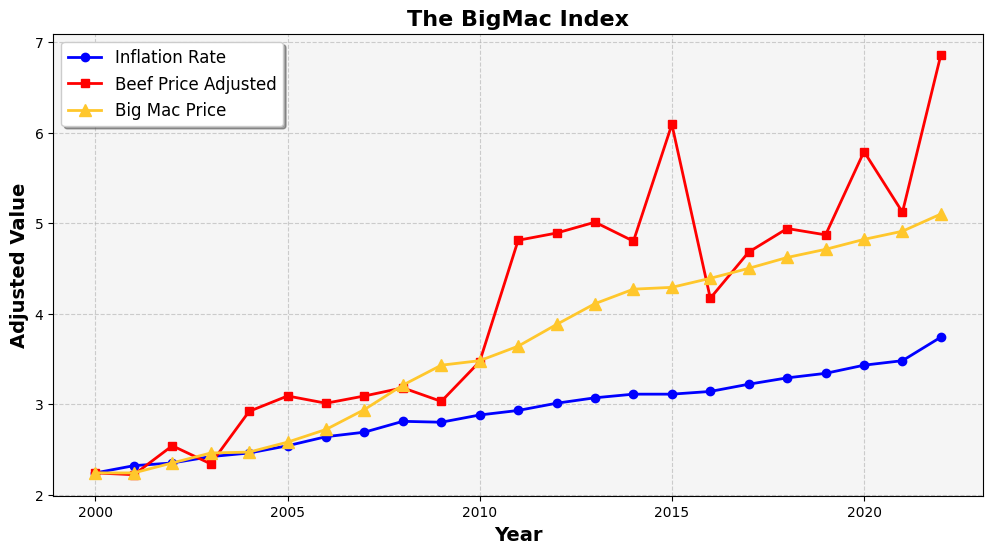

In [4]:
# Improved visualization without fill_between
plt.figure(figsize=(12, 6))

# Plot with thicker lines and larger markers
plt.plot(df_merged["year"], df_merged["inflation rate"], marker='o', color='blue', label="Inflation Rate", linewidth=2, markersize=6)
plt.plot(df_merged["year"], df_merged["Beef_Price_Adjusted"], marker='s', color='red', label="Beef Price Adjusted", linewidth=2, markersize=6)
plt.plot(df_merged["year"], df_merged["local_price"], marker='^', color='#FFC72C', label="Big Mac Price", linewidth=2, markersize=8)

# Enhance grid and background
plt.grid(True, linestyle="--", alpha=0.6)
plt.gca().set_facecolor("#F5F5F5")  # Light grey background

# Labels and title with improved styling
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Adjusted Value", fontsize=14, fontweight="bold")
plt.title("The BigMac Index", fontsize=16, fontweight="bold")

# Improve legend visibility
plt.legend(fontsize=12, frameon=True, shadow=True, loc="upper left")

# Show the updated chart
plt.show()

In [7]:
# Calculate the avg increase for inflation and BigMacs since 2005
# Filter data for years since 2005
df_filtered = df_merged[df_merged["year"] >= 2005].copy()

# Calculate the annual percent change for Inflation Rate and Big Mac Prices
df_filtered["inflation_rate_change"] = df_filtered["inflation rate"].pct_change() * 100
df_filtered["big_mac_price_change"] = df_filtered["local_price"].pct_change() * 100

# Compute the average annual percent increase
avg_inflation_increase = df_filtered["inflation_rate_change"].mean()
avg_big_mac_increase = df_filtered["big_mac_price_change"].mean()

# Round to 2 decimal places
avg_inflation_increase = round(avg_inflation_increase, 2)
avg_big_mac_increase = round(avg_big_mac_increase, 2)

# Create a formatted print statement for the results
print(f"Since 2005, the average annual percent increase is:\n"
      f"- Inflation Rate: {avg_inflation_increase}% per year\n"
      f"- Big Mac Price: {avg_big_mac_increase}% per year\n\n"
      f"This indicates that Big Mac prices have been increasing at nearly "
      f"twice the rate of inflation making the BigMac Index a "
      f"poor indicator of inflation in recent years.")


Since 2005, the average annual percent increase is:
- Inflation Rate: 2.32% per year
- Big Mac Price: 4.12% per year

This indicates that Big Mac prices have been increasing at nearly twice the rate of inflation making the BigMac Index a poor indicator of inflation in recent years.
